In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

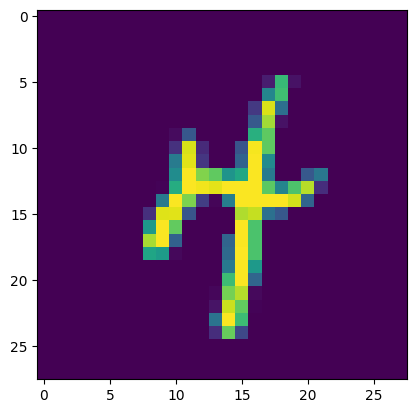

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[342])

In [6]:
x_train = x_train/255
x_test = x_test/255

In [25]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\SIDDHARTH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs= 6, validation_split= 0.2)

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8660 - loss: 0.4812 - val_accuracy: 0.9547 - val_loss: 0.1535
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.9593 - loss: 0.1401 - val_accuracy: 0.9633 - val_loss: 0.1296
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.9754 - loss: 0.0845 - val_accuracy: 0.9715 - val_loss: 0.1034
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.9816 - loss: 0.0637 - val_accuracy: 0.9714 - val_loss: 0.0951
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.9867 - loss: 0.0464 - val_accuracy: 0.9734 - val_loss: 0.0891
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.9889 - loss: 0.0375 - val_accuracy: 0.9738 - val_loss: 0.0867


In [29]:
y_probability = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


In [30]:
y_predicted  = y_probability.argmax(axis=1)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.9749

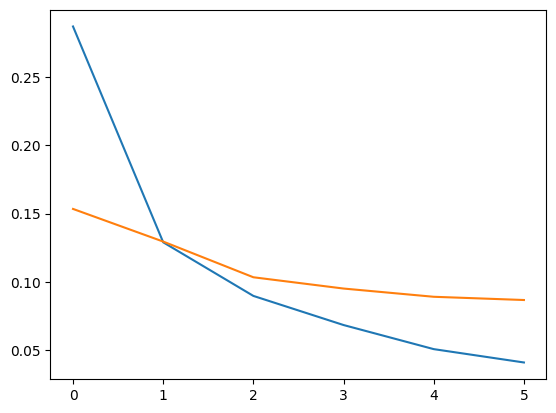

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

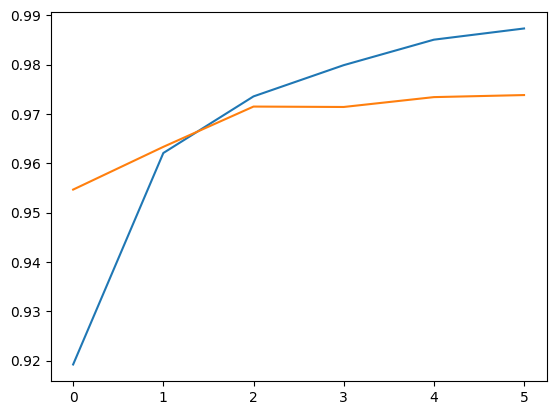

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])